In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df_1=pd.read_csv('SoftDrink.csv',parse_dates=['YearMonth'])

In [3]:
df_1.head()

,YearMonth,SoftDrinkProduction
0,1980-01-01,1954
1,1980-02-01,2302
2,1980-03-01,3054
3,1980-04-01,2414
4,1980-05-01,2226


In [4]:
# checking for the most recent date
max(df_1['YearMonth'])

Timestamp('1995-07-01 00:00:00')

In [5]:
# checking for the oldest date
min(df_1['YearMonth'])

Timestamp('1980-01-01 00:00:00')

In [6]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   YearMonth            187 non-null    datetime64[ns]
 1   SoftDrinkProduction  187 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 3.0 KB


In [7]:
df_1.isnull().sum()

YearMonth              0
SoftDrinkProduction    0
dtype: int64

In [8]:
from pylab import rcParams

In [9]:
# Loading the data as time series



df= pd.read_csv('SoftDrink.csv',parse_dates=['YearMonth'],index_col='YearMonth')

In [10]:
df.head()

,SoftDrinkProduction
YearMonth,
1980-01-01,1954
1980-02-01,2302
1980-03-01,3054
1980-04-01,2414
1980-05-01,2226


In [11]:
df.describe()

,SoftDrinkProduction
count,187.000000
mean,3262.609626
std,728.357367
min,1954.000000
25%,2748.000000
50%,3134.000000
75%,3741.000000
max,5725.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   SoftDrinkProduction  187 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB


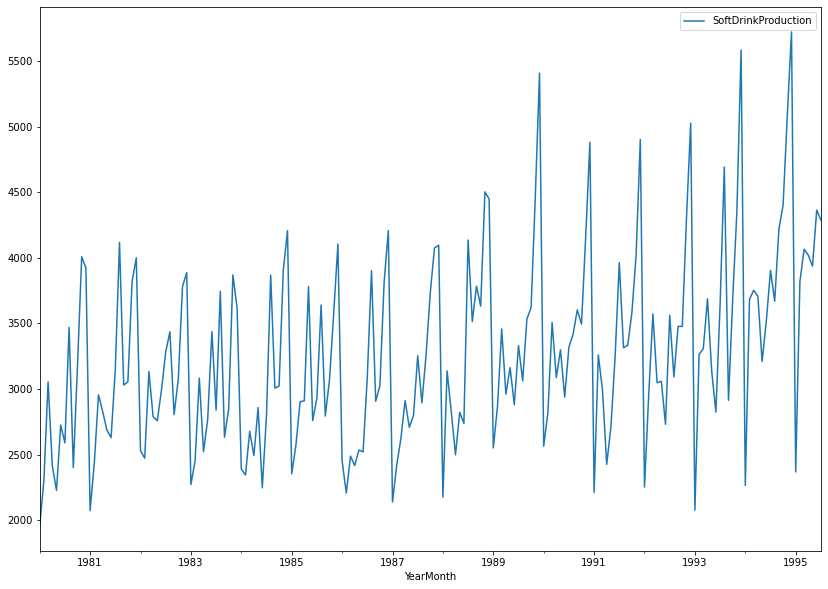

In [13]:
rcParams['figure.figsize']=14,10
df.plot()

plt.show()

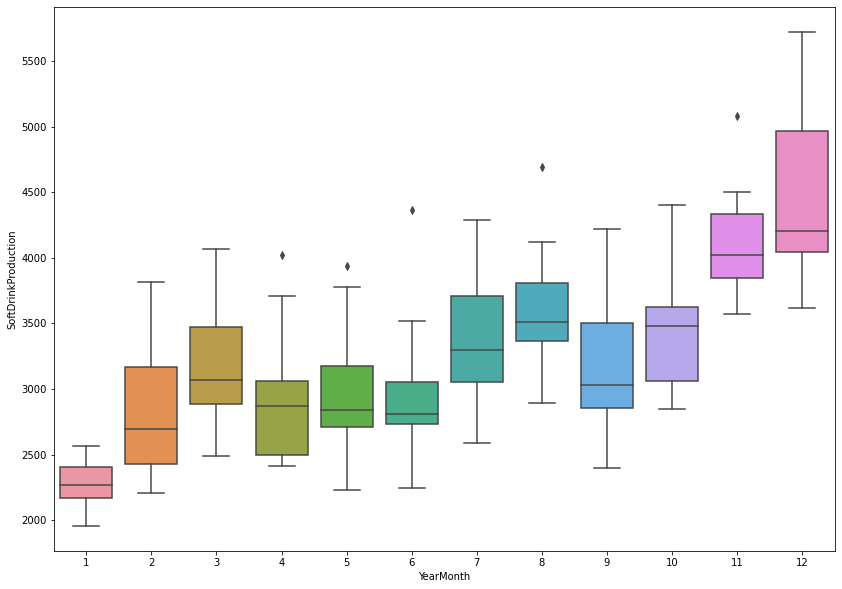

In [14]:
sns.boxplot(x=df.index.month,y=df['SoftDrinkProduction'])

In [15]:
df.isnull().sum()

SoftDrinkProduction    0
dtype: int64

In [16]:
# Checking the index function to show values

df['1980-01-01':'1995-07-01'].sum()


SoftDrinkProduction    610108
dtype: int64

In [17]:
df['1990-07-01':'1995-07-01']

,SoftDrinkProduction
YearMonth,
1990-07-01,3320
1990-08-01,3418
1990-09-01,3604
1990-10-01,3495
1990-11-01,4163
...,...
1995-03-01,4067
1995-04-01,4022
1995-05-01,3937


In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose

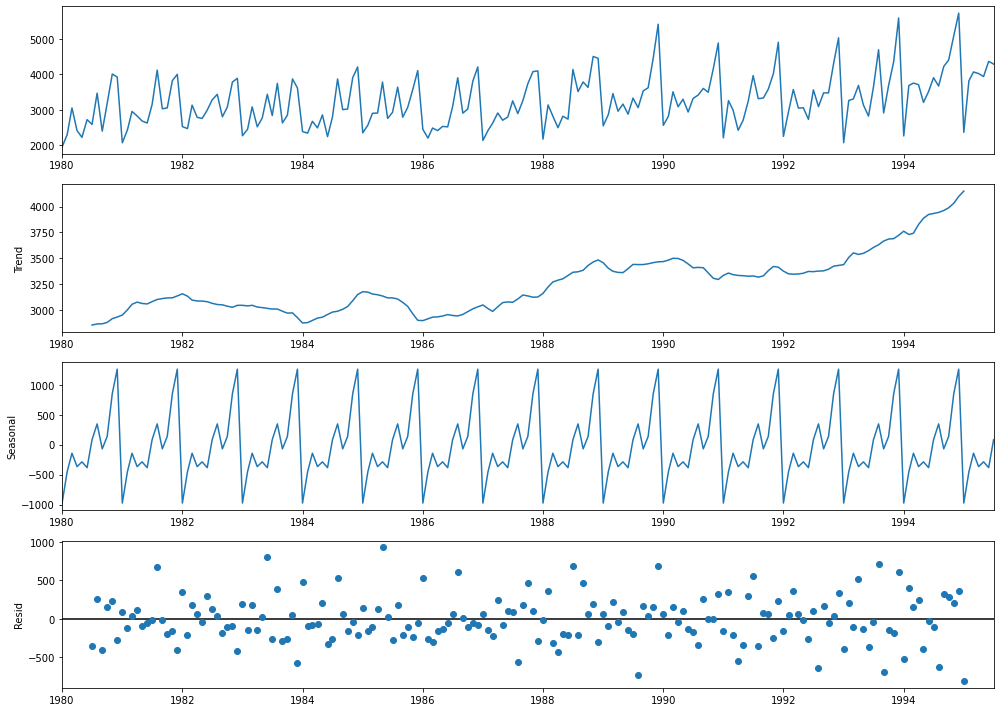

In [19]:
df_decompose_add = seasonal_decompose(df,model='additive', period= 12)
df_decompose_add.plot()
plt.show()

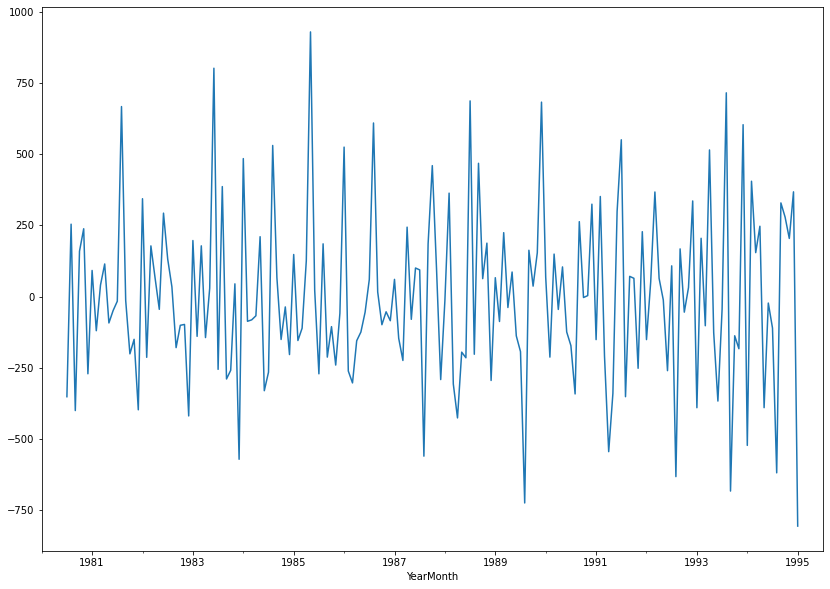

In [20]:
# Checking if tehre is a possible pattern in the error/residual/random

df_decompose_add.resid.plot()

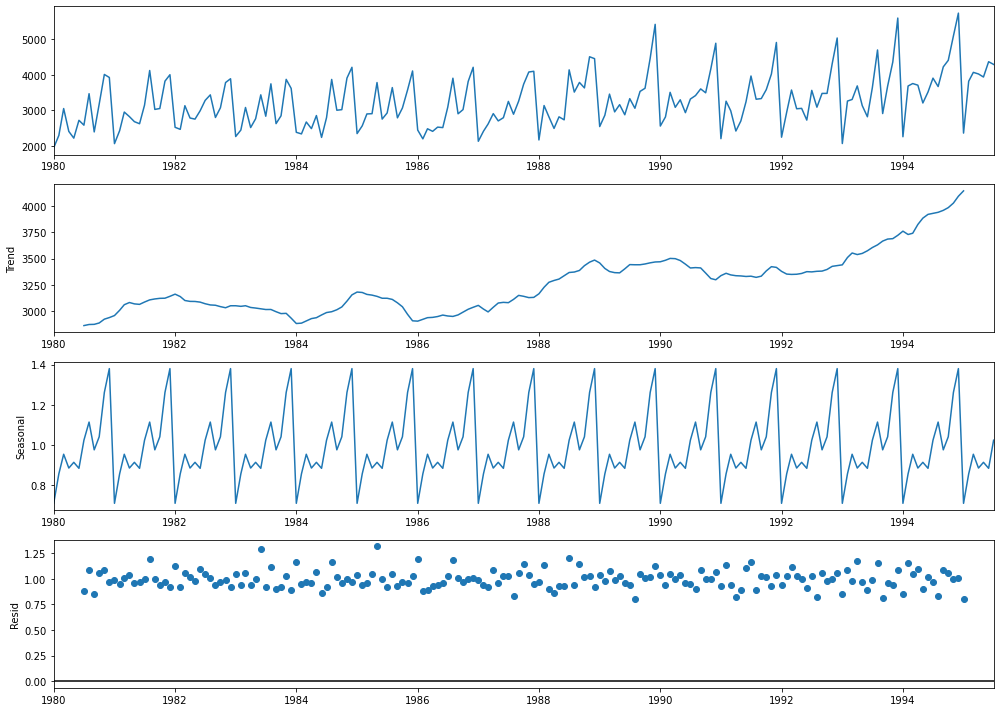

In [21]:
df_decompose_mult = seasonal_decompose(df,model='multiplicative')
df_decompose_mult.plot()
plt.show()

In [22]:
df_log=df.copy()

In [23]:
df_log['Shoe_Sales']=np.log(df)

In [24]:
df_log.Shoe_Sales

YearMonth
1980-01-01    7.577634
1980-02-01    7.741534
1980-03-01    8.024207
1980-04-01    7.789040
1980-05-01    7.707962
                ...   
1995-03-01    8.310661
1995-04-01    8.299535
1995-05-01    8.278174
1995-06-01    8.381373
1995-07-01    8.364042
Name: Shoe_Sales, Length: 187, dtype: float64

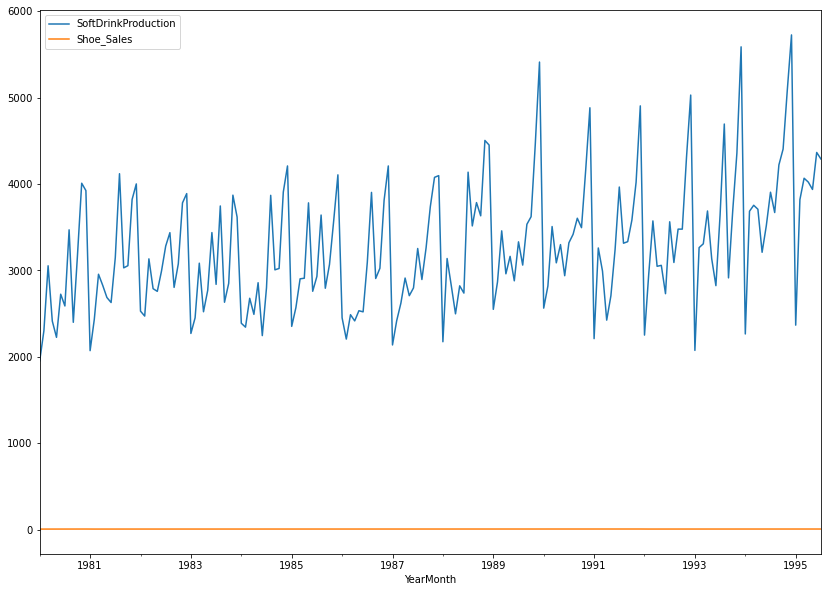

In [25]:
df_log.plot()
plt.show()

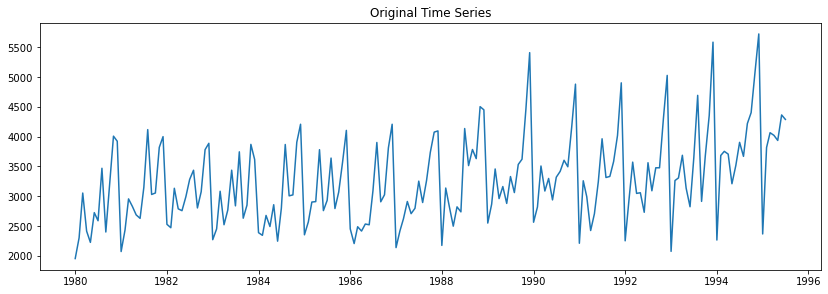

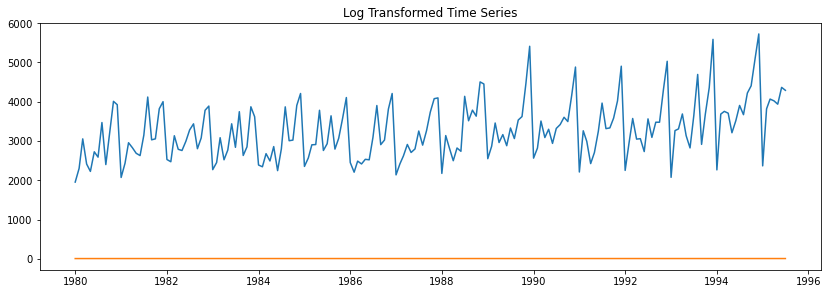

<Figure size 1008x720 with 0 Axes>

In [26]:
plt.subplot(2,1,1)
plt.title('Original Time Series')
plt.plot(df)
plt.show()

plt.subplot(2,1,1)
plt.title('Log Transformed Time Series')
plt.plot(df_log)
plt.show()
plt.tight_layout()


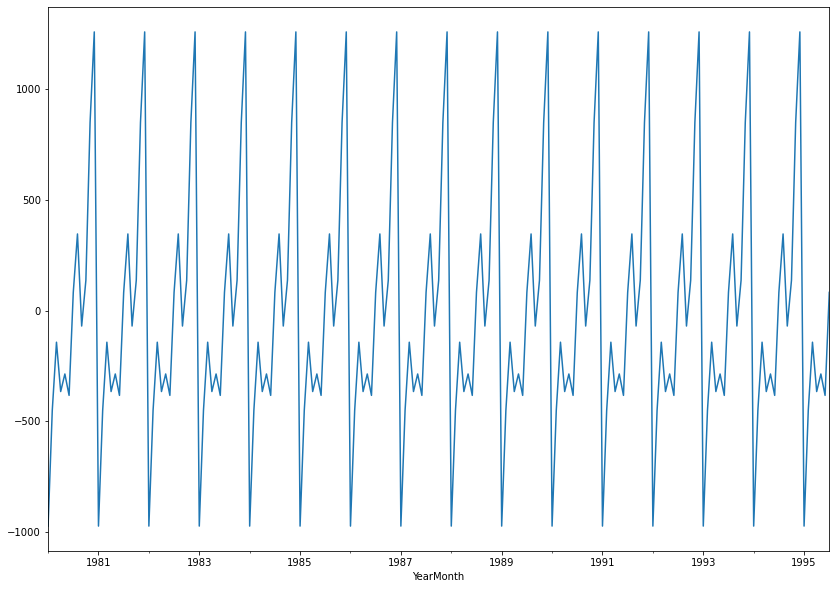

In [27]:
df_decompose_add.seasonal.plot()

In [28]:
df_decompose_add.observed

YearMonth
1980-01-01    1954.0
1980-02-01    2302.0
1980-03-01    3054.0
1980-04-01    2414.0
1980-05-01    2226.0
               ...  
1995-03-01    4067.0
1995-04-01    4022.0
1995-05-01    3937.0
1995-06-01    4365.0
1995-07-01    4290.0
Length: 187, dtype: float64

In [29]:
df_decompose_add.trend

YearMonth
1980-01-01   NaN
1980-02-01   NaN
1980-03-01   NaN
1980-04-01   NaN
1980-05-01   NaN
              ..
1995-03-01   NaN
1995-04-01   NaN
1995-05-01   NaN
1995-06-01   NaN
1995-07-01   NaN
Name: trend, Length: 187, dtype: float64

In [30]:
df_decompose_add.seasonal

YearMonth
1980-01-01   -974.619692
1980-02-01   -451.246677
1980-03-01   -143.118700
1980-04-01   -366.181200
1980-05-01   -286.815129
                 ...    
1995-03-01   -143.118700
1995-04-01   -366.181200
1995-05-01   -286.815129
1995-06-01   -383.594891
1995-07-01     82.191419
Name: seasonal, Length: 187, dtype: float64

In [31]:
df_decompose_add.resid

YearMonth
1980-01-01   NaN
1980-02-01   NaN
1980-03-01   NaN
1980-04-01   NaN
1980-05-01   NaN
              ..
1995-03-01   NaN
1995-04-01   NaN
1995-05-01   NaN
1995-06-01   NaN
1995-07-01   NaN
Name: resid, Length: 187, dtype: float64

In [32]:
df_decompose_mult.observed

YearMonth
1980-01-01    1954.0
1980-02-01    2302.0
1980-03-01    3054.0
1980-04-01    2414.0
1980-05-01    2226.0
               ...  
1995-03-01    4067.0
1995-04-01    4022.0
1995-05-01    3937.0
1995-06-01    4365.0
1995-07-01    4290.0
Length: 187, dtype: float64

In [33]:
df_decompose_mult.trend

YearMonth
1980-01-01   NaN
1980-02-01   NaN
1980-03-01   NaN
1980-04-01   NaN
1980-05-01   NaN
              ..
1995-03-01   NaN
1995-04-01   NaN
1995-05-01   NaN
1995-06-01   NaN
1995-07-01   NaN
Name: trend, Length: 187, dtype: float64

In [34]:
df_decompose_mult.seasonal

YearMonth
1980-01-01    0.709526
1980-02-01    0.856420
1980-03-01    0.953935
1980-04-01    0.885217
1980-05-01    0.913735
                ...   
1995-03-01    0.953935
1995-04-01    0.885217
1995-05-01    0.913735
1995-06-01    0.883890
1995-07-01    1.023936
Name: seasonal, Length: 187, dtype: float64

In [35]:
df_decompose_mult.resid

YearMonth
1980-01-01   NaN
1980-02-01   NaN
1980-03-01   NaN
1980-04-01   NaN
1980-05-01   NaN
              ..
1995-03-01   NaN
1995-04-01   NaN
1995-05-01   NaN
1995-06-01   NaN
1995-07-01   NaN
Name: resid, Length: 187, dtype: float64

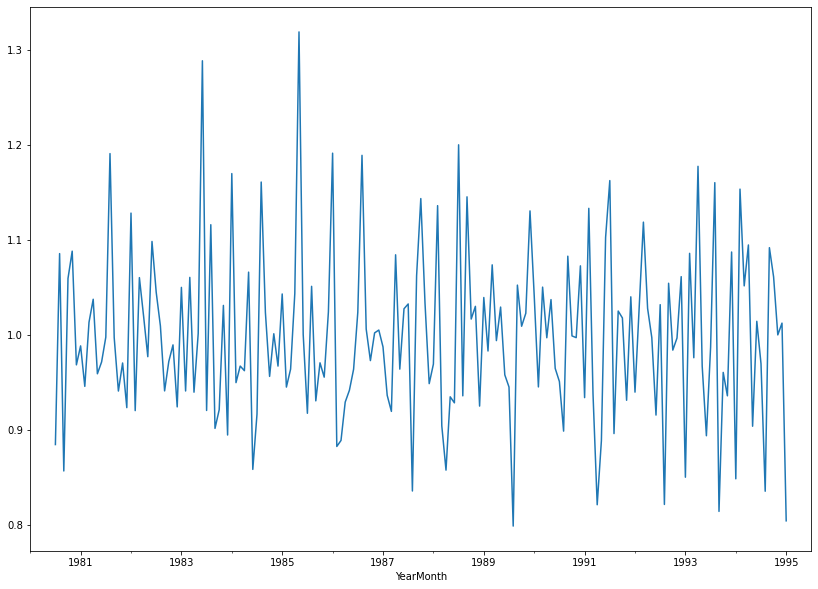

In [36]:
df_decompose_mult.resid.plot()

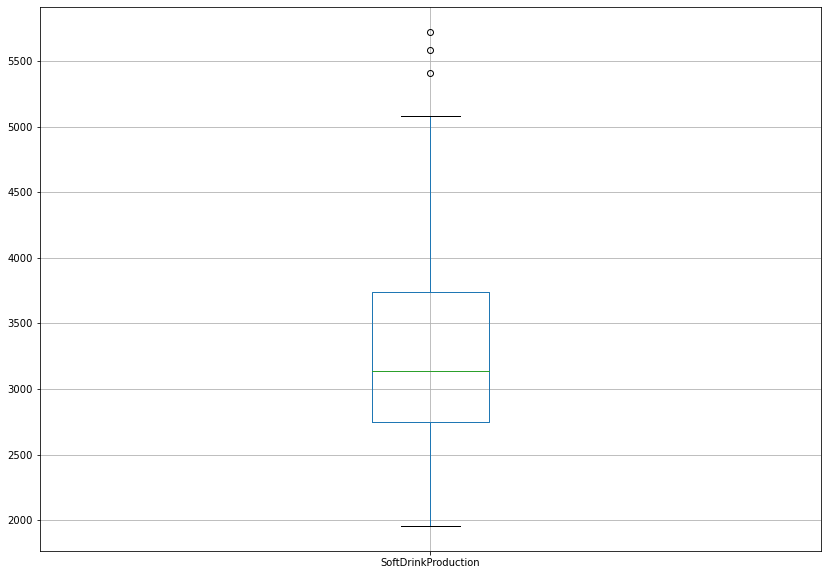

In [37]:
# Series with respect to sales will almost always contain outliers 

df.boxplot()

<ipython-input-38-a1ed56e47a47>:3: MatplotlibDeprecationWarning: Unrecognized location 'Best_Monthly'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  plt.legend(loc='Best_Monthly')


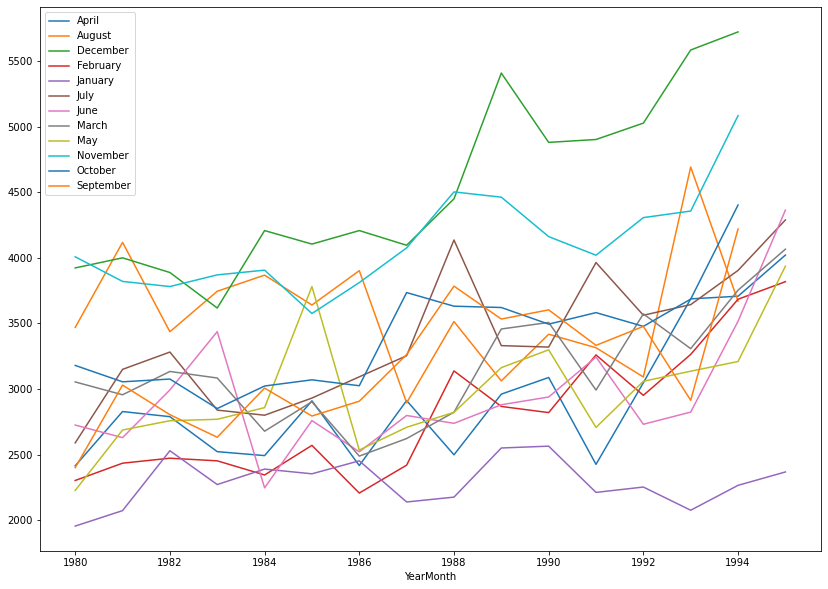

In [38]:
Monthly_Production_acrossYears= pd.pivot_table(df,values='SoftDrinkProduction', columns=df.index.month_name(), index=df.index.year)
Monthly_Production_acrossYears.plot()
plt.legend(loc='Best_Monthly')

In [39]:
Monthly_Production_acrossYears

YearMonth,April,August,December,February,January,July,June,March,May,November,October,September
YearMonth,,,,,,,,,,,,
1980,2414.0,3470.0,3924.0,2302.0,1954.0,2589.0,2725.0,3054.0,2226.0,4009.0,3180.0,2400.0
1981,2828.0,4119.0,4001.0,2434.0,2072.0,3150.0,2629.0,2956.0,2687.0,3821.0,3055.0,3030.0
1982,2789.0,3437.0,3889.0,2472.0,2529.0,3282.0,2993.0,3134.0,2758.0,3782.0,3076.0,2804.0
1983,2522.0,3746.0,3618.0,2452.0,2271.0,2839.0,3438.0,3084.0,2769.0,3871.0,2851.0,2632.0
1984,2492.0,3869.0,4209.0,2344.0,2389.0,2800.0,2246.0,2678.0,2858.0,3907.0,3023.0,3007.0
1985,2910.0,3641.0,4106.0,2570.0,2353.0,2931.0,2759.0,2903.0,3782.0,3576.0,3070.0,2794.0
1986,2416.0,3903.0,4209.0,2206.0,2452.0,3093.0,2521.0,2488.0,2534.0,3812.0,3025.0,2907.0
1987,2912.0,2895.0,4097.0,2419.0,2138.0,3254.0,2798.0,2622.0,2708.0,4077.0,3736.0,3263.0
1988,2498.0,3515.0,4451.0,3138.0,2175.0,4137.0,2738.0,2823.0,2822.0,4504.0,3632.0,3785.0


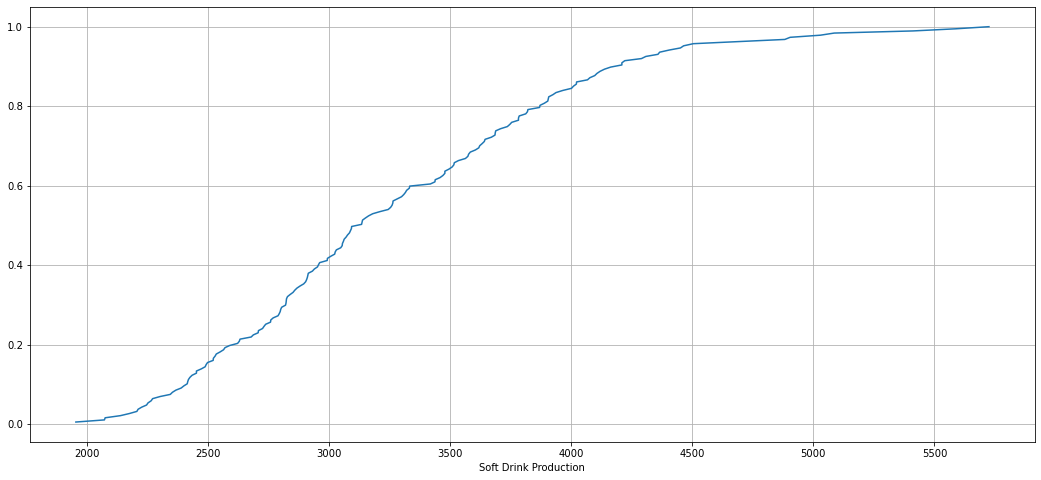

In [40]:
from statsmodels.distributions.empirical_distribution import ECDF

plt.figure(figsize = (18, 8))
cdf = ECDF(df['SoftDrinkProduction'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.xlabel('Soft Drink Production');

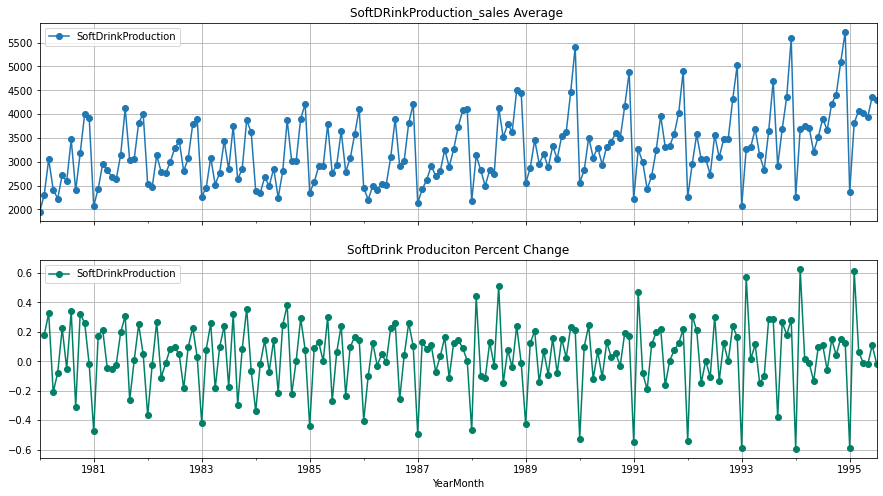

In [41]:
average    = df.groupby(df.index)["SoftDrinkProduction"].mean()
pct_change = df.groupby(df.index)["SoftDrinkProduction"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average RetailSales over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="SoftDRinkProduction_sales Average ",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
# plot precent change for RetailSales over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="SoftDrink Produciton Percent Change",grid=True)


In [42]:
train= df[df.index<='12-01-1990']
test =df[df.index>'12-01-1990']

In [43]:
display(train)

,SoftDrinkProduction
YearMonth,
1980-01-01,1954
1980-02-01,2302
1980-03-01,3054
1980-04-01,2414
1980-05-01,2226
...,...
1990-08-01,3418
1990-09-01,3604
1990-10-01,3495


In [44]:
display(test)

,SoftDrinkProduction
YearMonth,
1991-01-01,2211
1991-02-01,3260
1991-03-01,2992
1991-04-01,2425
1991-05-01,2707
1991-06-01,3244
1991-07-01,3965
1991-08-01,3315
1991-09-01,3333


In [45]:
len(train)

132

In [46]:
len(test)

55

In [47]:
total=132+55
total

187

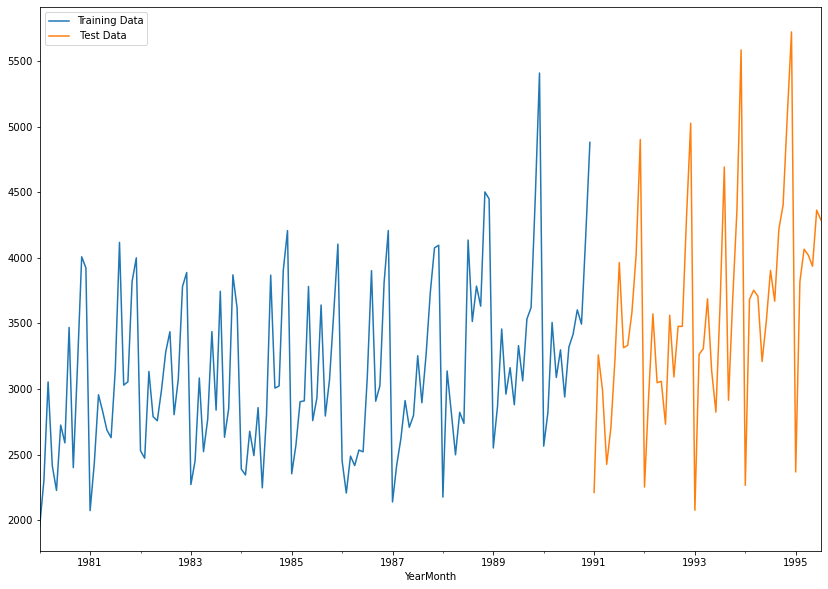

In [48]:
train['SoftDrinkProduction'].plot()
test['SoftDrinkProduction'].plot()
plt.legend(['Training Data',' Test Data'])
plt.show()

In [49]:
# Regression Models for the sales= f(time)

# add a column to include the time value since we earlier indexed the time value.

train_time =[i+1 for i in range(len(train))]
test_time=[i+1 for i in range (len(test))]



In [50]:
LinearRegression_train=train.copy()
LinearRegression_test=test.copy()

In [51]:
LinearRegression_train['time']=train_time
LinearRegression_test['time']=test_time

In [52]:
# LinearRegression

from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [53]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['SoftDrinkProduction'].values)

LinearRegression()

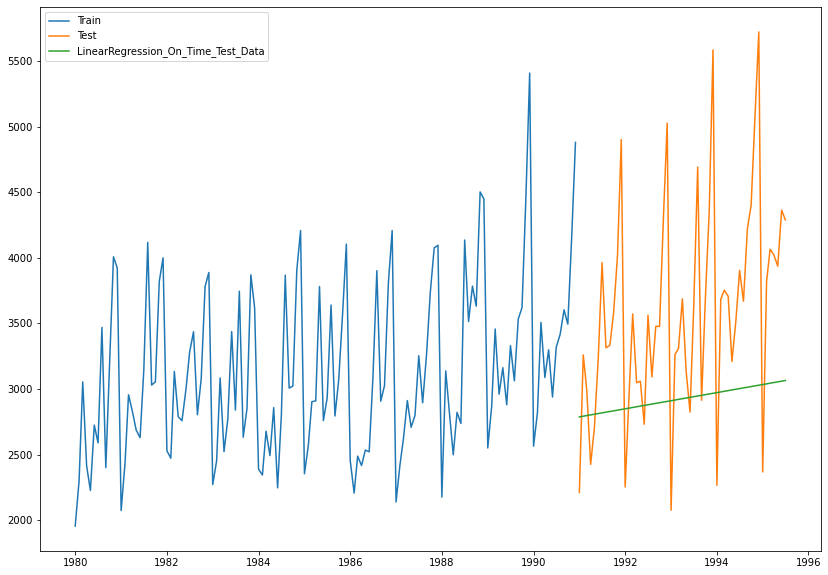

In [54]:
test_predictions_model1=lr.predict(LinearRegression_test[['time']])

LinearRegression_test['RgonTime']=test_predictions_model1

plt.plot(train['SoftDrinkProduction'], label='Train')
plt.plot(test['SoftDrinkProduction'],label='Test')
plt.plot(LinearRegression_test['RgonTime'], label='LinearRegression_On_Time_Test_Data')
plt.legend(loc='best')
plt.show()


In [55]:
from sklearn import metrics

In [56]:
rmse_model1_test=metrics.mean_squared_error(test['SoftDrinkProduction'], test_predictions_model1, squared=False)
print('Regression Model1 RMSE is %3.3f'%(rmse_model1_test))

Regression Model1 RMSE is 1024.196


In [57]:
resultsDF= pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['Regression On Time'])
resultsDF

,Test RMSE
Regression On Time,1024.196122


In [58]:
# Naive Based Approach

naivemodel_train=train.copy()
naivemodel_test=test.copy()

naivemodel_test['naive']=np.array(train['SoftDrinkProduction'])[len(np.array(train['SoftDrinkProduction']))-1]
naivemodel_test['naive'].head()

YearMonth
1991-01-01    4882
1991-02-01    4882
1991-03-01    4882
1991-04-01    4882
1991-05-01    4882
Name: naive, dtype: int64

Text(0.5, 1.0, 'Naive Forecast')

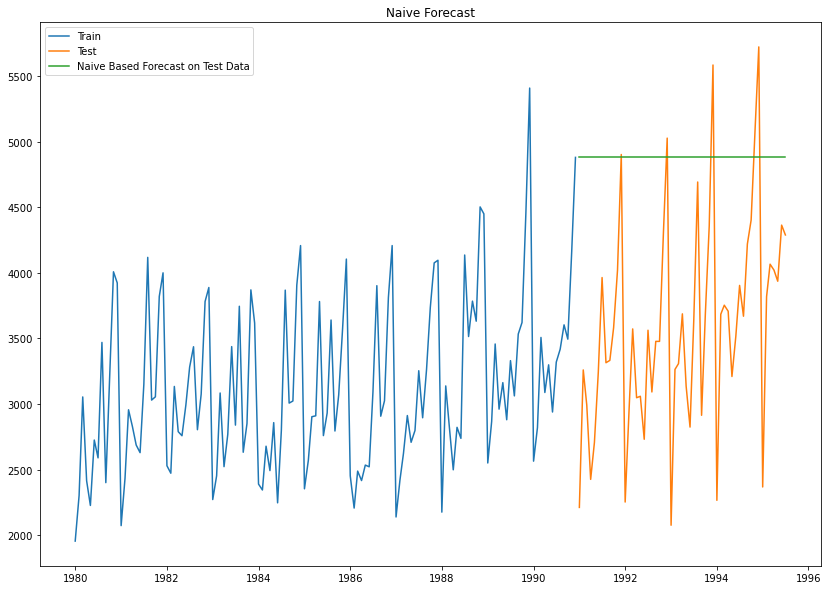

In [59]:
plt.plot(naivemodel_train['SoftDrinkProduction'],label='Train')
plt.plot(naivemodel_test['SoftDrinkProduction'],label='Test')
plt.plot(naivemodel_test['naive'],label='Naive Based Forecast on Test Data')
plt.legend(loc='best')
plt.title('Naive Forecast')

In [60]:
rmse_model2_test=metrics.mean_squared_error(test['SoftDrinkProduction'],naivemodel_test['naive'],squared=False)
print('Naive Model2 RMSE is %3.3f'%(rmse_model2_test))

Naive Model2 RMSE is 1519.259


In [61]:
resultsDF_2= pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['Naive Model'])
resultsDF_2

,Test RMSE
Naive Model,1519.259233


In [62]:
resultsDF=pd.concat([resultsDF,resultsDF_2])

In [63]:
resultsDF

,Test RMSE
Regression On Time,1024.196122
Naive Model,1519.259233


In [64]:
# Simple Average

simpleavg_train= train.copy()
simpleavg_test=test.copy()

simpleavg_test['simpleaveg_forecast']=train['SoftDrinkProduction'].mean()
simpleavg_test.head


<bound method NDFrame.head of             SoftDrinkProduction  simpleaveg_forecast
YearMonth                                           
1991-01-01                 2211          3124.166667
1991-02-01                 3260          3124.166667
1991-03-01                 2992          3124.166667
1991-04-01                 2425          3124.166667
1991-05-01                 2707          3124.166667
1991-06-01                 3244          3124.166667
1991-07-01                 3965          3124.166667
1991-08-01                 3315          3124.166667
1991-09-01                 3333          3124.166667
1991-10-01                 3583          3124.166667
1991-11-01                 4021          3124.166667
1991-12-01                 4904          3124.166667
1992-01-01                 2252          3124.166667
1992-02-01                 2952          3124.166667
1992-03-01                 3573          3124.166667
1992-04-01                 3048          3124.166667
1992-05-01      

Text(0.5, 1.0, 'Simple Average')

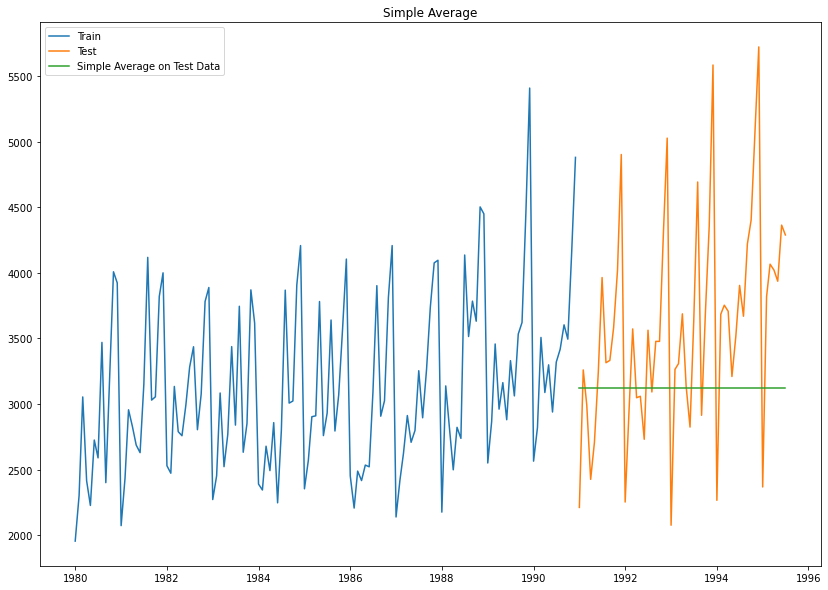

In [65]:
plt.plot(simpleavg_train['SoftDrinkProduction'],label='Train')
plt.plot(simpleavg_test['SoftDrinkProduction'],label='Test')
plt.plot(simpleavg_test['simpleaveg_forecast'],label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title('Simple Average')

In [66]:
rmse_model3_test=metrics.mean_squared_error(test['SoftDrinkProduction'],simpleavg_test['simpleaveg_forecast'],squared=False)
print('Simple Average RMSE is %3.3f'%(rmse_model3_test))

Simple Average RMSE is 934.353


In [67]:
resultsDF_3= pd.DataFrame({'Test RMSE': [rmse_model3_test]},index=['Simple Average Model'])
resultsDF_3

,Test RMSE
Simple Average Model,934.353358


In [68]:
resultsDF=pd.concat([resultsDF_3,resultsDF])

In [69]:
resultsDF

,Test RMSE
Simple Average Model,934.353358
Regression On Time,1024.196122
Naive Model,1519.259233


In [70]:
MovingAverage=df.copy()
MovingAverage.head()

,SoftDrinkProduction
YearMonth,
1980-01-01,1954
1980-02-01,2302
1980-03-01,3054
1980-04-01,2414
1980-05-01,2226


In [71]:
MovingAverage['Trailing_2'] = MovingAverage['SoftDrinkProduction'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['SoftDrinkProduction'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['SoftDrinkProduction'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['SoftDrinkProduction'].rolling(9).mean()

MovingAverage.head(20)

,SoftDrinkProduction,Trailing_2,Trailing_4,Trailing_6,Trailing_9
YearMonth,,,,,
1980-01-01,1954,NaN,NaN,NaN,NaN
1980-02-01,2302,2128.0,NaN,NaN,NaN
1980-03-01,3054,2678.0,NaN,NaN,NaN
1980-04-01,2414,2734.0,2431.00,NaN,NaN
1980-05-01,2226,2320.0,2499.00,NaN,NaN
1980-06-01,2725,2475.5,2604.75,2445.833333,NaN
1980-07-01,2589,2657.0,2488.50,2551.666667,NaN
1980-08-01,3470,3029.5,2752.50,2746.333333,NaN
1980-09-01,2400,2935.0,2796.00,2637.333333,2570.444444


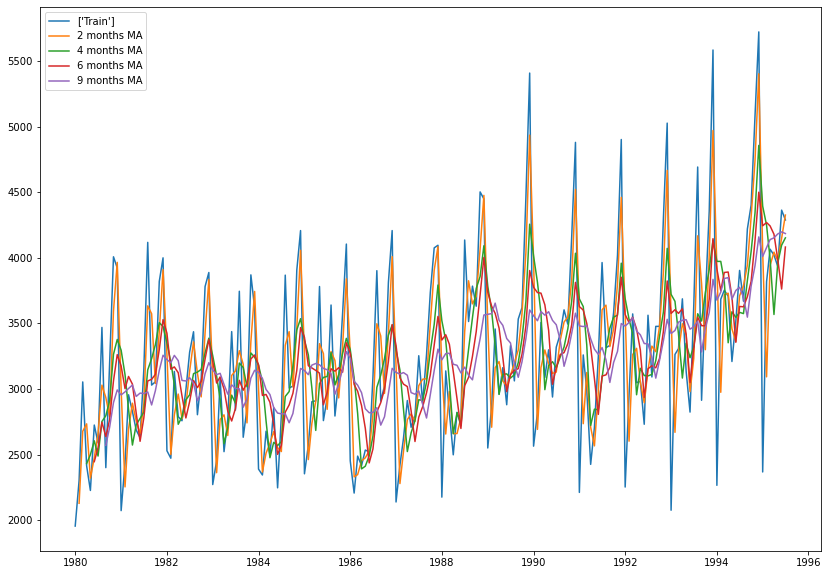

In [72]:
plt.plot(MovingAverage['SoftDrinkProduction'], Label=['Train'])
plt.plot(MovingAverage['Trailing_2'], label ='2 months MA')
plt.plot(MovingAverage['Trailing_4'], label= '4 months MA')
plt.plot(MovingAverage['Trailing_6'], label='6 months MA')
plt.plot(MovingAverage['Trailing_9'],label='9 months MA')
plt.legend(loc='best')


In [73]:
MovingAverage_train=MovingAverage[MovingAverage.index<='12-01-1990']
MovingAverage_test=MovingAverage[MovingAverage.index>'12-01-1990']


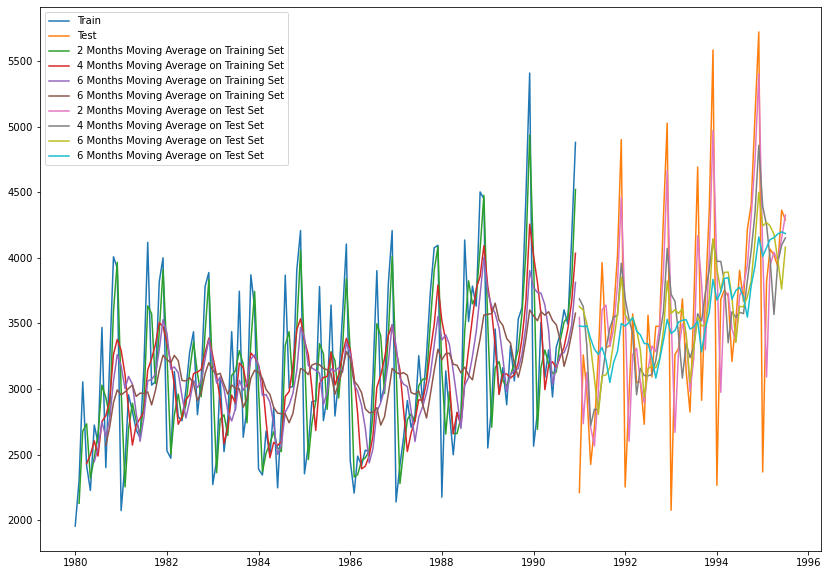

In [74]:
plt.plot(MovingAverage_train['SoftDrinkProduction'],label='Train')
plt.plot(MovingAverage_test['SoftDrinkProduction'],label='Test')
plt.plot(MovingAverage_train['Trailing_2'], label='2 Months Moving Average on Training Set')
plt.plot(MovingAverage_train['Trailing_4'], label='4 Months Moving Average on Training Set')
plt.plot(MovingAverage_train['Trailing_6'], label='6 Months Moving Average on Training Set')
plt.plot(MovingAverage_train['Trailing_9'], label='6 Months Moving Average on Training Set')

plt.plot(MovingAverage_test['Trailing_2'], label='2 Months Moving Average on Test Set')
plt.plot(MovingAverage_test['Trailing_4'], label='4 Months Moving Average on Test Set')
plt.plot(MovingAverage_test['Trailing_6'], label='6 Months Moving Average on Test Set')
plt.plot(MovingAverage_test['Trailing_9'], label='6 Months Moving Average on Test Set')

plt.legend(loc='best')



In [75]:
rmse_model4_test=metrics.mean_squared_error(test['SoftDrinkProduction'],MovingAverage_test['SoftDrinkProduction'],squared=False)
print('Moving Average RMSE is %3.3f'%(rmse_model4_test))


Moving Average RMSE is 0.000


In [76]:
rmse_model5_test=metrics.mean_squared_error(test['SoftDrinkProduction'],MovingAverage_test['Trailing_2'],squared=False)
print('Moving Average 2 months RMSE is %3.3f'%(rmse_model5_test))

Moving Average 2 months RMSE is 556.725


In [77]:
rmse_model6_test=metrics.mean_squared_error(test['SoftDrinkProduction'],MovingAverage_test['Trailing_4'],squared=False)
print('Moving Average 4 months RMSE is %3.3f'%(rmse_model6_test))

rmse_model7_test=metrics.mean_squared_error(test['SoftDrinkProduction'],MovingAverage_test['Trailing_6'],squared=False)
print('Moving Average 6 months RMSE is %3.3f'%(rmse_model7_test))

rmse_model8_test=metrics.mean_squared_error(test['SoftDrinkProduction'],MovingAverage_test['Trailing_9'],squared=False)
print('Moving Average 4 months RMSE is %3.3f'%(rmse_model8_test))

Moving Average 4 months RMSE is 687.182
Moving Average 6 months RMSE is 710.514
Moving Average 4 months RMSE is 735.890


In [78]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model5_test,rmse_model6_test
                                          ,rmse_model7_test,rmse_model8_test]}
                           ,index=['2_Months_MA','4_Months_MA'
                                   ,'6_Months_MA','9_Months_MA'])

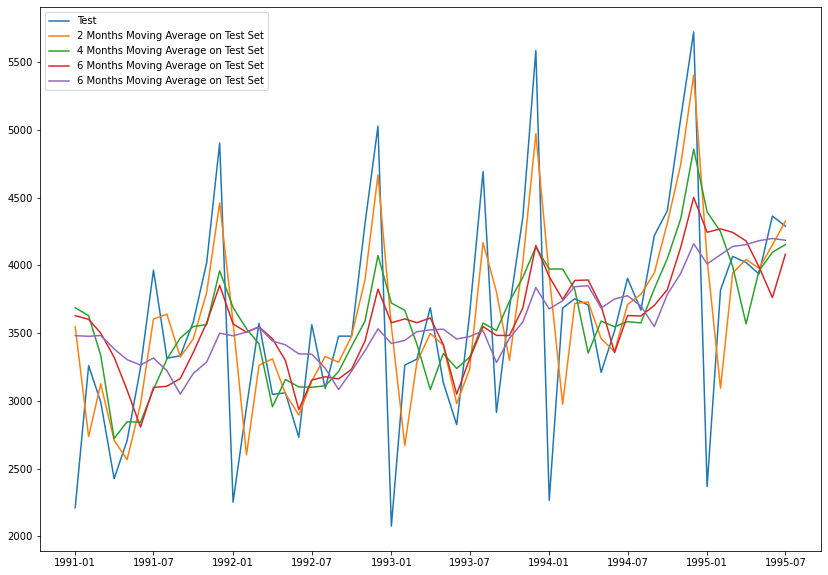

In [79]:
plt.plot(MovingAverage_test['SoftDrinkProduction'],label='Test')
plt.plot(MovingAverage_test['Trailing_2'], label='2 Months Moving Average on Test Set')
plt.plot(MovingAverage_test['Trailing_4'], label='4 Months Moving Average on Test Set')
plt.plot(MovingAverage_test['Trailing_6'], label='6 Months Moving Average on Test Set')
plt.plot(MovingAverage_test['Trailing_9'], label='6 Months Moving Average on Test Set')
plt.legend(loc='best')


In [80]:
resultsDf_4

,Test RMSE
2_Months_MA,556.725418
4_Months_MA,687.181726
6_Months_MA,710.513877
9_Months_MA,735.889827


In [81]:
resultsDF=pd.concat([resultsDF,resultsDf_4])

In [82]:
resultsDF

,Test RMSE
Simple Average Model,934.353358
Regression On Time,1024.196122
Naive Model,1519.259233
2_Months_MA,556.725418
4_Months_MA,687.181726
6_Months_MA,710.513877
9_Months_MA,735.889827


In [83]:
# Simple Exponential Smoothing

ses_train=train.copy()
ses_test=test.copy()

In [84]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing,Holt

In [85]:
model_ses=SimpleExpSmoothing(ses_train['SoftDrinkProduction'])

C:\Users\sanjay singh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [86]:
model_ses_autofit=model_ses.fit(optimized= True)

C:\Users\sanjay singh\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [87]:
model_ses_autofit.params

{'smoothing_level': 0.0608437799750656,
 'smoothing_slope': nan,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 2851.4667545175416,
 'initial_slope': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [88]:
ses_test['predict']=model_ses_autofit.forecast(steps=len(test))
ses_test.head()

,SoftDrinkProduction,predict
YearMonth,,
1991-01-01,2211,3500.995826
1991-02-01,3260,3500.995826
1991-03-01,2992,3500.995826
1991-04-01,2425,3500.995826
1991-05-01,2707,3500.995826


Text(0.5, 1.0, 'Alpha =0.608 Forecast')

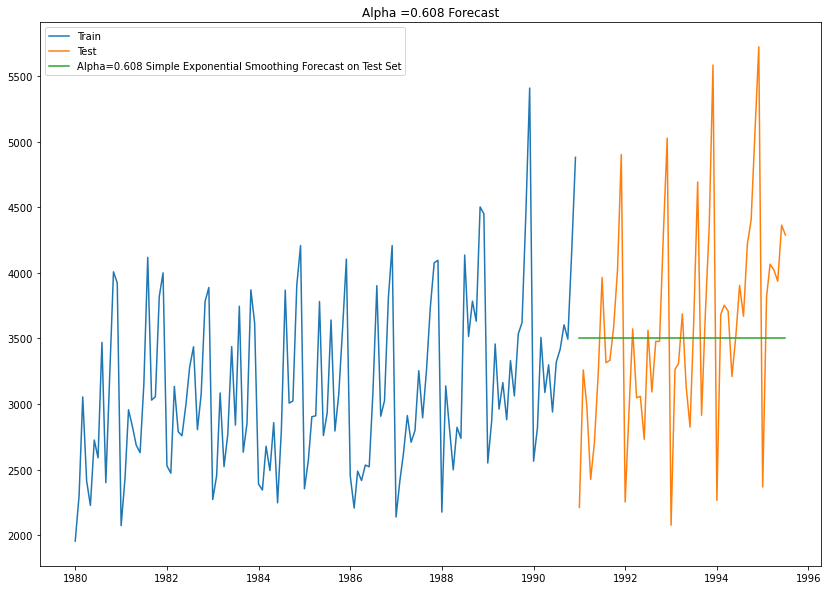

In [89]:
plt.plot(ses_train['SoftDrinkProduction'], label='Train')
plt.plot(ses_test['SoftDrinkProduction'],label='Test')
plt.plot(ses_test['predict'],label= 'Alpha=0.608 Simple Exponential Smoothing Forecast on Test Set' )
plt.legend(loc='best')
plt.title('Alpha =0.608 Forecast')


In [90]:
rmse_model9_test= metrics.mean_squared_error(ses_test['SoftDrinkProduction'],ses_test['predict'], squared= False)
print('Simple Exponential Smoothing RMSE is  %3.3f'%(rmse_model9_test))


Simple Exponential Smoothing RMSE is  812.567


In [91]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model9_test]},index=['Alpha= 0.605,Simple Exponential Smoothing'])
resultsDf_5

,Test RMSE
"Alpha= 0.605,Simple Exponential Smoothing",812.566843


In [92]:
resultsDF=pd.concat([resultsDF, resultsDf_5])

In [93]:
resultsDF

,Test RMSE
Simple Average Model,934.353358
Regression On Time,1024.196122
Naive Model,1519.259233
2_Months_MA,556.725418
4_Months_MA,687.181726
6_Months_MA,710.513877
9_Months_MA,735.889827
"Alpha= 0.605,Simple Exponential Smoothing",812.566843


In [94]:
# Double Exponential Smoothing

des_train=train.copy()
des_test= test.copy()

In [95]:
des_model=Holt(des_train['SoftDrinkProduction'])

C:\Users\sanjay singh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [96]:
model_des_autofit=des_model.fit()

C:\Users\sanjay singh\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\sanjay singh\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:743: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warn("Optimization failed to converge. Check mle_retvals.",


In [97]:
model_des_autofit.params

{'smoothing_level': 0.04867766954818179,
 'smoothing_slope': 0.048677227200726474,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 3198.793873479106,
 'initial_slope': 4.646711702618128,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [98]:
des_test['predict']=model_des_autofit.forecast(steps=len(test))
des_test.head()

,SoftDrinkProduction,predict
YearMonth,,
1991-01-01,2211,3617.544282
1991-02-01,3260,3632.046571
1991-03-01,2992,3646.548860
1991-04-01,2425,3661.051149
1991-05-01,2707,3675.553439


Text(0.5, 1.0, 'Alpha=0.599, Beta=0.0 Holt Forecast')

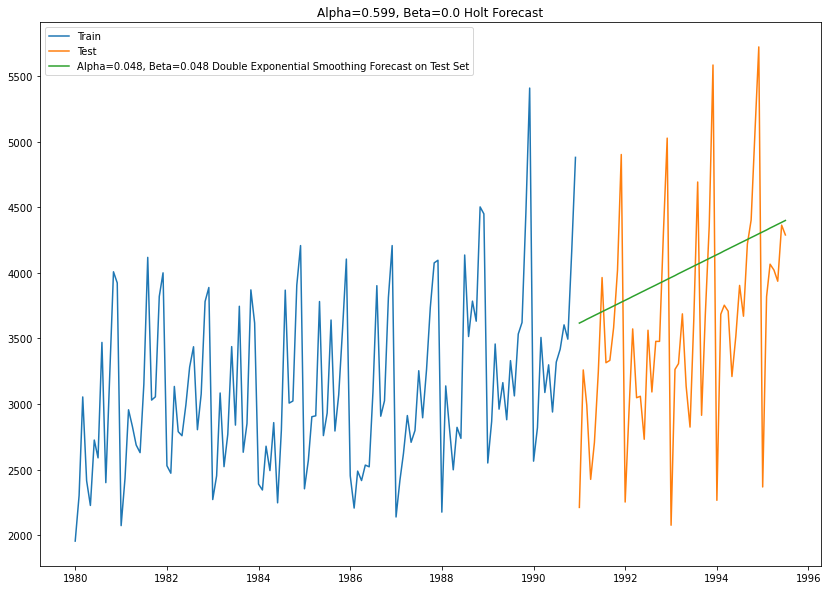

In [99]:
plt.plot(des_train['SoftDrinkProduction'], label='Train')
plt.plot(des_test['SoftDrinkProduction'],label='Test')
plt.plot(des_test['predict'],label= 'Alpha=0.048, Beta=0.048 Double Exponential Smoothing Forecast on Test Set' )
plt.legend(loc='best')
plt.title('Alpha=0.599, Beta=0.0 Holt Forecast')

In [100]:
rmse_model11_test= metrics.mean_squared_error(des_test['SoftDrinkProduction'],des_test['predict'], squared= False)
print('Holt Exponential Smoothing RMSE is  %3.3f'%(rmse_model11_test))

Holt Exponential Smoothing RMSE is  846.862


In [101]:
resultsDf_6 = pd.DataFrame({'Test RMSE': [rmse_model11_test]},index=['Holt (Double) Exponential Smoothing'])
resultsDf_6

,Test RMSE
Holt (Double) Exponential Smoothing,846.861559


In [102]:
resultsDF=pd.concat([resultsDF, resultsDf_6])

In [103]:
resultsDF

,Test RMSE
Simple Average Model,934.353358
Regression On Time,1024.196122
Naive Model,1519.259233
2_Months_MA,556.725418
4_Months_MA,687.181726
6_Months_MA,710.513877
9_Months_MA,735.889827
"Alpha= 0.605,Simple Exponential Smoothing",812.566843
Holt (Double) Exponential Smoothing,846.861559


In [104]:
# Triple Exponential Smmothing

tes_train=train.copy()
tes_test=test.copy()


In [105]:
model_TES = ExponentialSmoothing(tes_train['SoftDrinkProduction'],trend='additive', seasonal='multiplicative')
model_TES_autofit = model_TES.fit()

C:\Users\sanjay singh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\sanjay singh\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\sanjay singh\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [106]:
model_TES_autofit.params

{'smoothing_level': 0.09106845706505141,
 'smoothing_slope': 3.860419856116834e-09,
 'smoothing_seasonal': 0.0,
 'damping_slope': nan,
 'initial_level': 2313.470810226906,
 'initial_slope': 3.476131260113104,
 'initial_seasons': array([0.93487388, 1.0255687 , 1.19731628, 1.08945523, 1.15655121,
        1.11721154, 1.26131471, 1.41355353, 1.22495989, 1.29333061,
        1.58909936, 1.69303296]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [107]:
tes_test['auto_predict']=model_TES_autofit.forecast(steps=len(test))
tes_test.head()

,SoftDrinkProduction,auto_predict
YearMonth,,
1991-01-01,2211,2591.515628
1991-02-01,3260,2846.491057
1991-03-01,2992,3327.342697
1991-04-01,2425,3031.383859
1991-05-01,2707,3222.097195


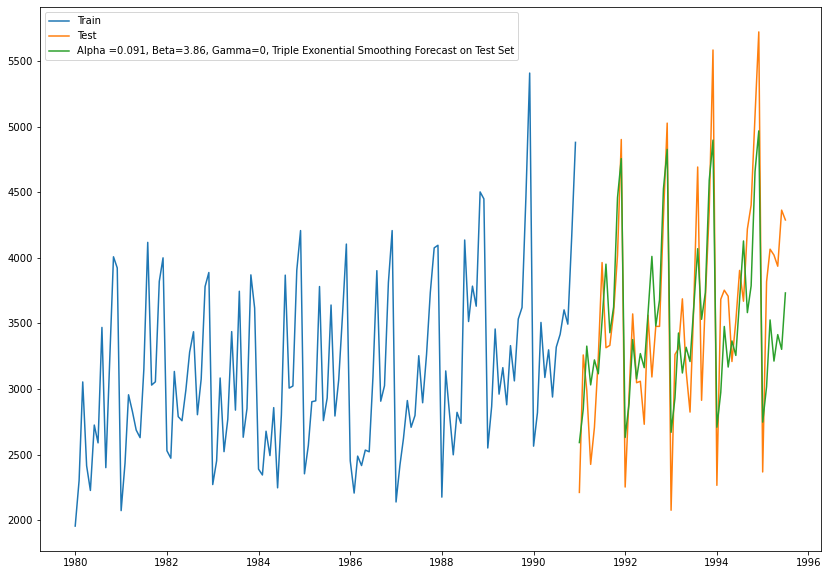

In [108]:
plt.plot(tes_train['SoftDrinkProduction'], label='Train')
plt.plot(tes_test['SoftDrinkProduction'],label='Test')

plt.plot(tes_test['auto_predict'],label= 'Alpha =0.091, Beta=3.86, Gamma=0, Triple Exonential Smoothing Forecast on Test Set')
plt.legend(loc='best')


In [109]:
rmse_model13_test=metrics.mean_squared_error(tes_test['SoftDrinkProduction'],tes_test['auto_predict'], squared=False)
print ('Alpha =0.572, Beta=2.532, Gamma=1.335 Triple Exponential Smoothing RMSE is %3.3f'%(rmse_model13_test))

Alpha =0.572, Beta=2.532, Gamma=1.335 Triple Exponential Smoothing RMSE is 466.824


In [110]:
resultsDf_9= pd.DataFrame({'Test RMSE': [rmse_model13_test]}
                           ,index=['lpha =0.572, Beta=2.532, Gamma=1.335,TripleExponentialSmoothing'])

resultsDF=pd.concat([resultsDF, resultsDf_9])

In [111]:
resultsDF

,Test RMSE
Simple Average Model,934.353358
Regression On Time,1024.196122
Naive Model,1519.259233
2_Months_MA,556.725418
4_Months_MA,687.181726
6_Months_MA,710.513877
9_Months_MA,735.889827
"Alpha= 0.605,Simple Exponential Smoothing",812.566843
Holt (Double) Exponential Smoothing,846.861559
"lpha =0.572, Beta=2.532, Gamma=1.335,TripleExponentialSmoothing",466.824271


In [112]:
from statsmodels.tsa.stattools import adfuller

dftest= adfuller(df,regression='ct')
print ('Dickey Fuller Test Statisitics is %3.3f'%dftest[0])
print ('Dickey Fuller Test p_value is ',dftest[1])
print ('Number of Lags used',dftest[2])

Dickey Fuller Test Statisitics is -0.425
Dickey Fuller Test p_value is  0.9861019765758294
Number of Lags used 12


In [113]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

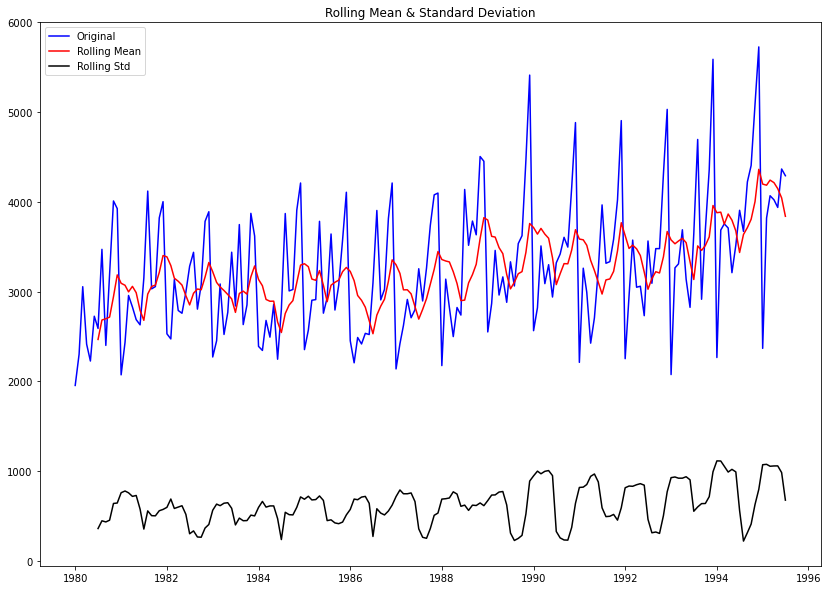

Results of Dickey-Fuller Test:
Test Statistic                   1.098734
p-value                          0.995206
#Lags Used                      12.000000
Number of Observations Used    174.000000
Critical Value (1%)             -3.468502
Critical Value (5%)             -2.878298
Critical Value (10%)            -2.575704
dtype: float64 



In [114]:
test_stationarity(df['SoftDrinkProduction'])

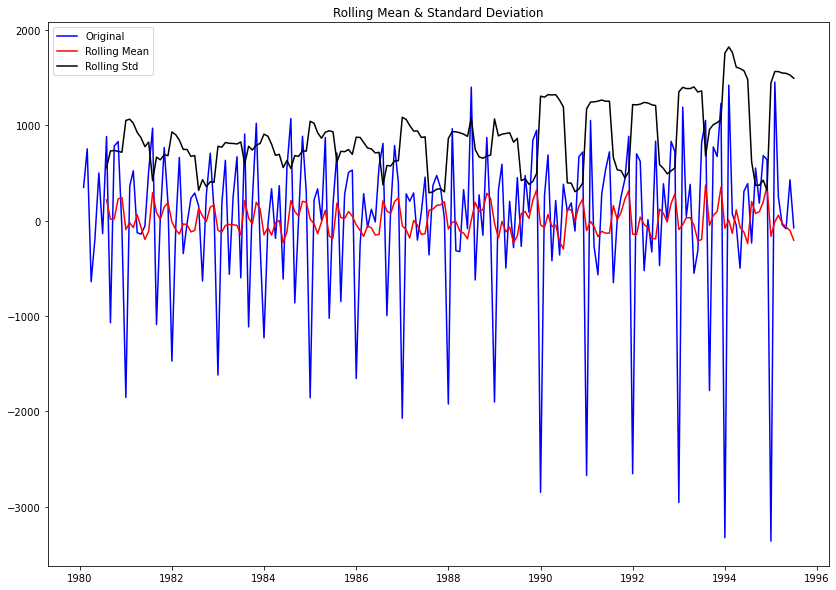

Results of Dickey-Fuller Test:
Test Statistic                -9.313527e+00
p-value                        1.033701e-15
#Lags Used                     1.100000e+01
Number of Observations Used    1.740000e+02
Critical Value (1%)           -3.468502e+00
Critical Value (5%)           -2.878298e+00
Critical Value (10%)          -2.575704e+00
dtype: float64 



In [115]:
test_stationarity(df['SoftDrinkProduction'].diff().dropna())

In [116]:
import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [117]:
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [118]:
from statsmodels.tsa.arima_model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train['SoftDrinkProduction'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:2105.61181288216
ARIMA(0, 1, 1) - AIC:2064.1122677395574
ARIMA(0, 1, 2) - AIC:2051.644185107792
ARIMA(1, 1, 0) - AIC:2099.443226649569
ARIMA(1, 1, 1) - AIC:2056.6807481320047
ARIMA(1, 1, 2) - AIC:2051.4746642695723
ARIMA(2, 1, 0) - AIC:2073.4302554318065
ARIMA(2, 1, 1) - AIC:2053.938330031688
ARIMA(2, 1, 2) - AIC:2053.4169491452794


In [119]:
ARIMA_AIC.sort_values(by='AIC',ascending=True)

,param,AIC
5,"(1, 1, 2)",2051.474664
2,"(0, 1, 2)",2051.644185
8,"(2, 1, 2)",2053.416949
7,"(2, 1, 1)",2053.938330
4,"(1, 1, 1)",2056.680748
1,"(0, 1, 1)",2064.112268
6,"(2, 1, 0)",2073.430255
3,"(1, 1, 0)",2099.443227
0,"(0, 1, 0)",2105.611813


In [120]:
auto_ARIMA = ARIMA(train['SoftDrinkProduction'],order= (1,1,2))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

C:\Users\sanjay singh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\sanjay singh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                               ARIMA Model Results                               
Dep. Variable:     D.SoftDrinkProduction   No. Observations:                  131
Model:                    ARIMA(1, 1, 2)   Log Likelihood               -1020.737
Method:                          css-mle   S.D. of innovations            575.568
Date:                   Mon, 16 Aug 2021   AIC                           2051.475
Time:                           12:02:36   BIC                           2065.851
Sample:                       02-01-1980   HQIC                          2057.316
                            - 12-01-1990                                         
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           5.2702      1.666      3.163      0.002       2.005       8.536
ar.L1.D.SoftDrinkProduction    -0.3034      0.178     -1

In [121]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [122]:
rmse_Arima1= metrics.mean_squared_error(test['SoftDrinkProduction'], predicted_auto_ARIMA[0], squared=False)
rmse_Arima1

785.379150940222

In [123]:
resultsArima = pd.DataFrame({'RMSE': [rmse_Arima1]}
                           ,index=['ARIMA(1,1,2)'])

resultsArima

,RMSE
"ARIMA(1,1,2)",785.379151


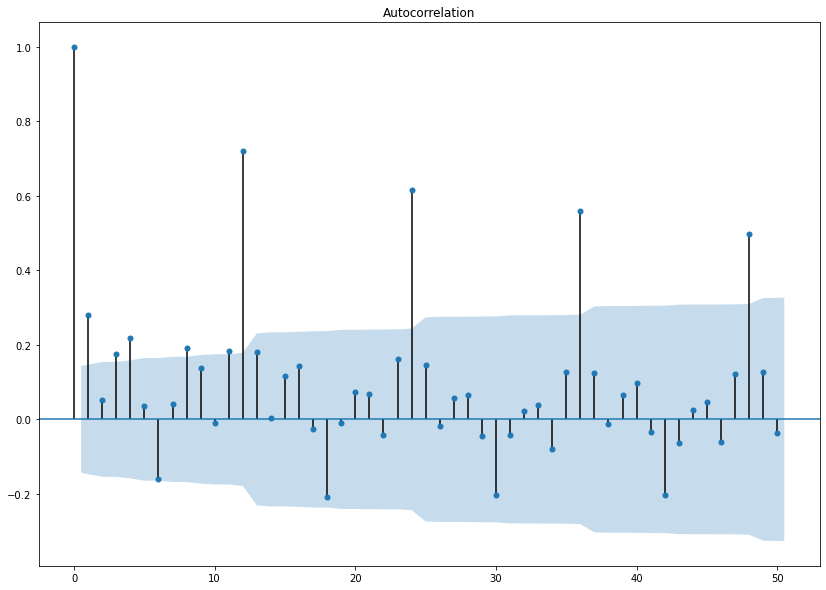

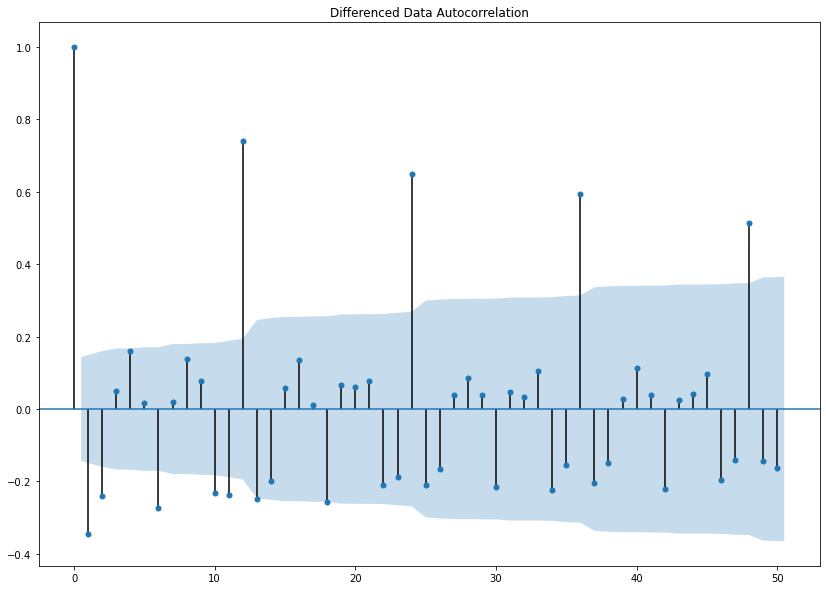

In [124]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df['SoftDrinkProduction'],lags=50)
plot_acf(df['SoftDrinkProduction'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

C:\Users\sanjay singh\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


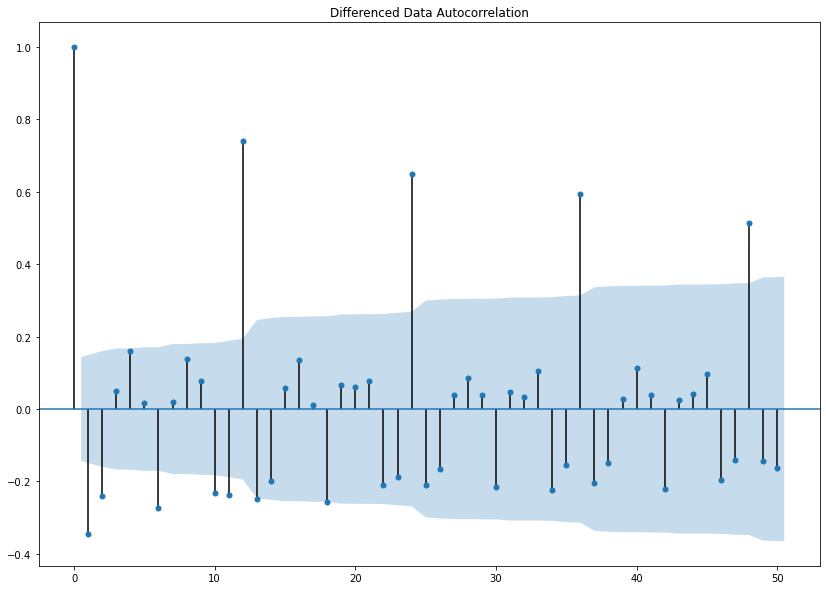

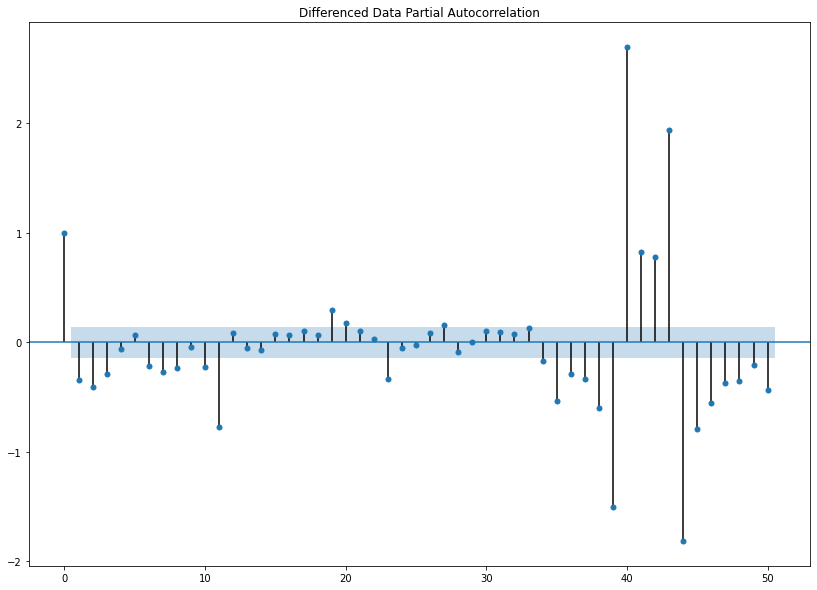

In [125]:
# ACF plot (not differenced)= 15= Q
# Q =0 ( since the cut off is post 12 )

# Plot PACF 

plot_acf(df['SoftDrinkProduction'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df['SoftDrinkProduction'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()


In [126]:
manual_ARIMA = ARIMA(train['SoftDrinkProduction'], order=(3,1,2))

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

C:\Users\sanjay singh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\sanjay singh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                               ARIMA Model Results                               
Dep. Variable:     D.SoftDrinkProduction   No. Observations:                  131
Model:                    ARIMA(3, 1, 2)   Log Likelihood               -1020.704
Method:                          css-mle   S.D. of innovations            575.253
Date:                   Mon, 16 Aug 2021   AIC                           2055.408
Time:                           12:02:37   BIC                           2075.534
Sample:                       02-01-1980   HQIC                          2063.586
                            - 12-01-1990                                         
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           5.2319      1.623      3.224      0.001       2.051       8.413
ar.L1.D.SoftDrinkProduction    -0.2950      0.333     -0

In [127]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [128]:
rmse_man_arima = metrics.mean_squared_error(test['SoftDrinkProduction'],predicted_manual_ARIMA[0],squared=False)
print(rmse_man_arima)

784.7345359778947


In [129]:
resultsArima1 = pd.DataFrame({'RMSE': [rmse_man_arima]}
                           ,index=['ARIMA_MAN(3,1,2)'])

resultsArima1

,RMSE
"ARIMA_MAN(3,1,2)",784.734536


In [130]:
resultsArima=pd.concat([resultsArima,resultsArima1])

In [131]:
resultsArima

,RMSE
"ARIMA(1,1,2)",785.379151
"ARIMA_MAN(3,1,2)",784.734536


In [132]:
# Sarima Model

import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)


In [133]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [134]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['SoftDrinkProduction'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 6) - AIC:2088.4633983660715
SARIMA(0, 1, 0)x(0, 0, 1, 6) - AIC:1991.6865911393159
SARIMA(0, 1, 0)x(0, 0, 2, 6) - AIC:1835.7619130456815
SARIMA(0, 1, 0)x(1, 0, 0, 6) - AIC:2001.2435317896568
SARIMA(0, 1, 0)x(1, 0, 1, 6) - AIC:1938.0559371006502
SARIMA(0, 1, 0)x(1, 0, 2, 6) - AIC:1819.7378453396861
SARIMA(0, 1, 0)x(2, 0, 0, 6) - AIC:1790.660005159761
SARIMA(0, 1, 0)x(2, 0, 1, 6) - AIC:1790.4200171307236
SARIMA(0, 1, 0)x(2, 0, 2, 6) - AIC:1765.5917640436885
SARIMA(0, 1, 1)x(0, 0, 0, 6) - AIC:2033.525066201947
SARIMA(0, 1, 1)x(0, 0, 1, 6) - AIC:1932.6082414358698
SARIMA(0, 1, 1)x(0, 0, 2, 6) - AIC:1785.220363072822
SARIMA(0, 1, 1)x(1, 0, 0, 6) - AIC:1952.5333036693323
SARIMA(0, 1, 1)x(1, 0, 1, 6) - AIC:1856.5216278991516
SARIMA(0, 1, 1)x(1, 0, 2, 6) - AIC:1747.6522126080213
SARIMA(0, 1, 1)x(2, 0, 0, 6) - AIC:1748.724256750826
SARIMA(0, 1, 1)x(2, 0, 1, 6) - AIC:1750.622848638314
SARIMA(0, 1, 1)x(2, 0, 2, 6) - AIC:1698.7792709100988
SARIMA(0, 1, 2)x(0, 0, 0, 6) - AI

In [135]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
26,"(0, 1, 2)","(2, 0, 2, 6)",1686.172022
53,"(1, 1, 2)","(2, 0, 2, 6)",1688.140126
80,"(2, 1, 2)","(2, 0, 2, 6)",1689.372226
17,"(0, 1, 1)","(2, 0, 2, 6)",1698.779271
44,"(1, 1, 1)","(2, 0, 2, 6)",1700.331865


In [136]:
auto_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['SoftDrinkProduction'].values,
                                order=(0, 1, 2),
                                seasonal_order=(2, 0, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000)
print(results_auto_SARIMA_6.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  132
Model:             SARIMAX(0, 1, 2)x(2, 0, 2, 6)   Log Likelihood                -836.086
Date:                           Mon, 16 Aug 2021   AIC                           1686.172
Time:                                   12:03:04   BIC                           1705.447
Sample:                                        0   HQIC                          1693.997
                                           - 132                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7796      0.116     -6.725      0.000      -1.007      -0.552
ma.L2         -0.0866      0.094     -0.926

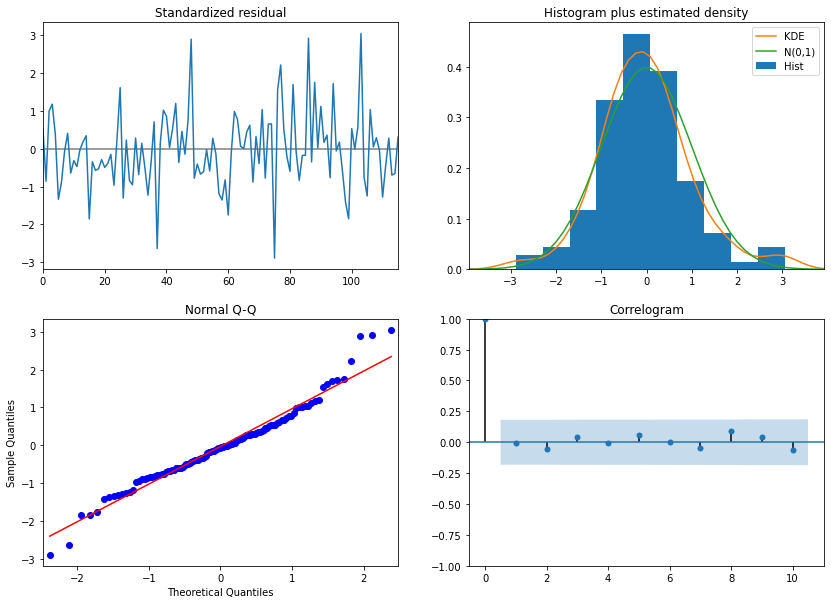

In [137]:
results_auto_SARIMA_6.plot_diagnostics()
plt.show()

In [138]:
predicted_auto_SARIMA_6 = results_auto_SARIMA_6.get_forecast(steps=len(test))

In [139]:
predicted_auto_SARIMA_6.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,2716.673115,318.160867,2093.089274,3340.256956
1,3110.192201,325.804057,2471.627982,3748.756419
2,3344.813264,328.573818,2700.820414,3988.806114
3,3103.980292,331.319868,2454.605284,3753.355300
4,3290.414390,334.044128,2635.699930,3945.128849


In [140]:
rmse = metrics.mean_squared_error(test['SoftDrinkProduction'],predicted_auto_SARIMA_6.predicted_mean,squared=False)
print(rmse)

447.94519728764527


In [141]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['SARIMA(0,1,2)(2,0,2,6)'])


resultsArima = pd.concat([resultsArima,temp_resultsDf])

resultsArima

,RMSE
"ARIMA(1,1,2)",785.379151
"ARIMA_MAN(3,1,2)",784.734536
"SARIMA(0,1,2)(2,0,2,6)",447.945197


In [142]:
import statsmodels.api as sm

auto_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['SoftDrinkProduction'].values,
                                order=(0, 1, 2),
                                seasonal_order=(2, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_12 = auto_SARIMA_12.fit(maxiter=1000)
print(results_auto_SARIMA_12.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(0, 1, 2)x(2, 0, 2, 12)   Log Likelihood                -751.604
Date:                            Mon, 16 Aug 2021   AIC                           1517.208
Time:                                    12:03:06   BIC                           1535.719
Sample:                                         0   HQIC                          1524.707
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9980      0.141     -7.092      0.000      -1.274      -0.722
ma.L2         -0.1064      0.121   

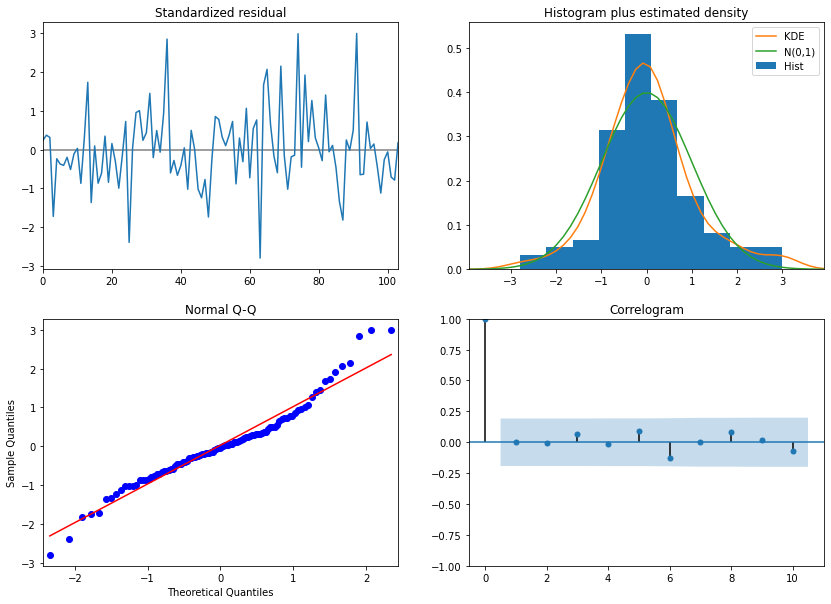

In [143]:
results_auto_SARIMA_12.plot_diagnostics()
plt.show()

In [144]:
predicted_auto_SARIMA_12 = results_auto_SARIMA_12.get_forecast(steps=len(test))

In [145]:
predicted_auto_SARIMA_12.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,2657.038572,328.611986,2012.970915,3301.106229
1,2979.319755,334.135024,2324.427142,3634.212368
2,3404.303347,335.600779,2746.537907,4062.068787
3,3086.472484,337.060814,2425.845428,3747.099539
4,3284.546411,338.514578,2621.070029,3948.022793


In [146]:
rmse = metrics.mean_squared_error(test['SoftDrinkProduction'],predicted_auto_SARIMA_12.predicted_mean,squared=False)
print(rmse)

437.7074094660907


In [147]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['SARIMA(1,1,2)(2,0,2,12)'])


resultsArima = pd.concat([resultsArima,temp_resultsDf])

resultsArima

,RMSE
"ARIMA(1,1,2)",785.379151
"ARIMA_MAN(3,1,2)",784.734536
"SARIMA(0,1,2)(2,0,2,6)",447.945197
"SARIMA(1,1,2)(2,0,2,12)",437.707409


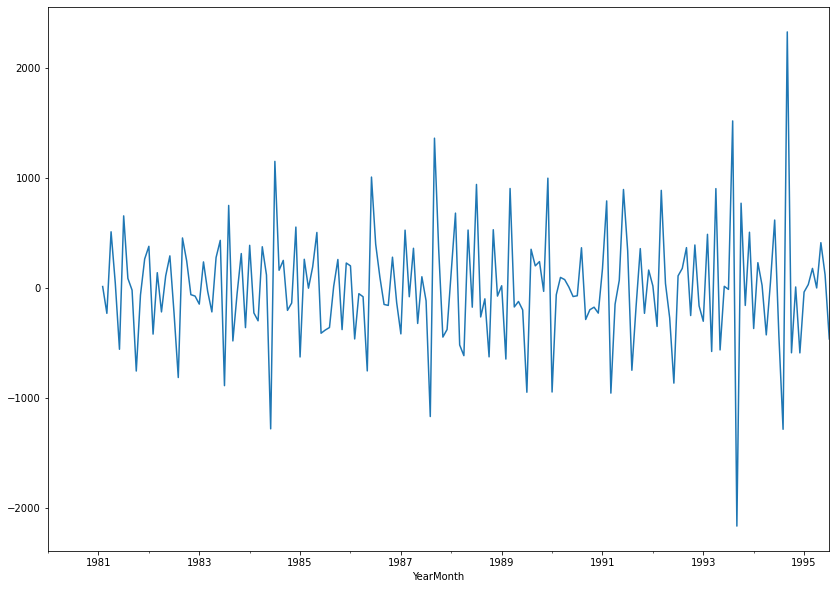

In [148]:
df['SoftDrinkProduction'].diff(12).diff().plot()

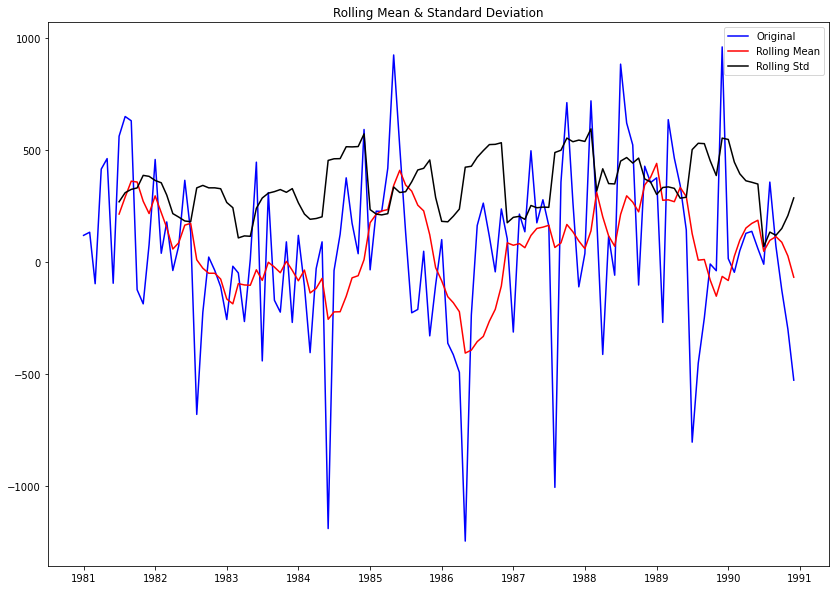

Results of Dickey-Fuller Test:
Test Statistic                  -4.709548
p-value                          0.000081
#Lags Used                      11.000000
Number of Observations Used    108.000000
Critical Value (1%)             -3.492401
Critical Value (5%)             -2.888697
Critical Value (10%)            -2.581255
dtype: float64 



In [149]:
test_stationarity(train['SoftDrinkProduction'].diff(12).dropna())

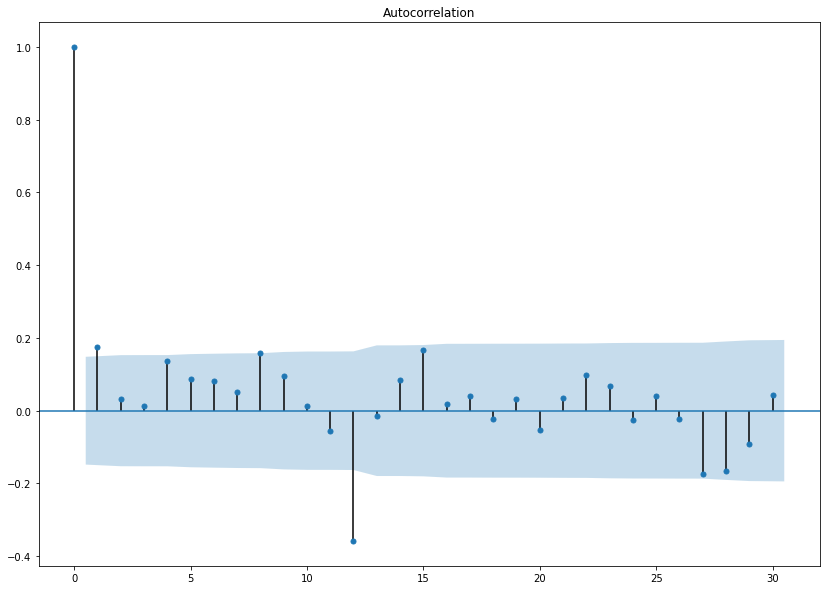

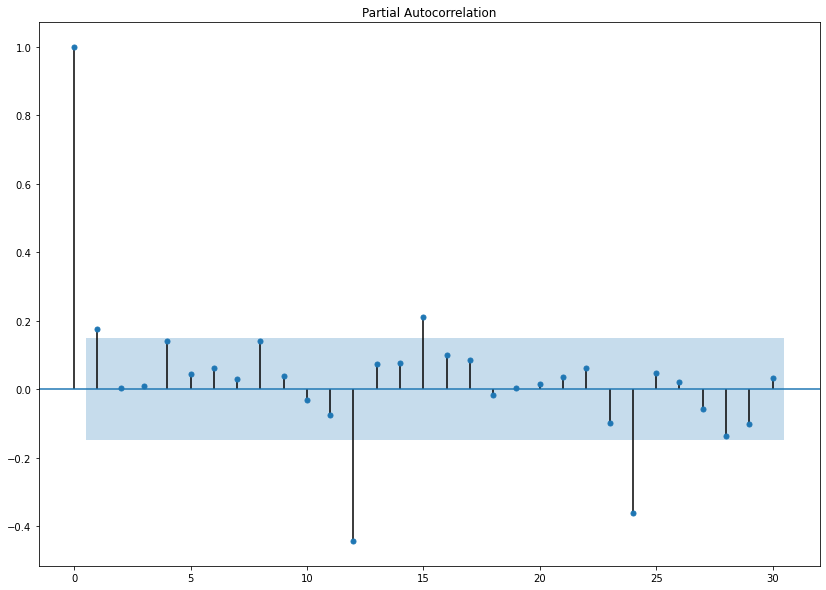

In [150]:
plot_acf((df['SoftDrinkProduction'].diff(12).dropna()),lags=30)
plot_pacf((df['SoftDrinkProduction'].diff(12).dropna()),lags=30);

In [151]:
manual_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['SoftDrinkProduction'].values,
                                order=(3,1,1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_12 = manual_SARIMA_12.fit(maxiter=1000)
print(results_manual_SARIMA_12.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(3, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -751.294
Date:                            Mon, 16 Aug 2021   AIC                           1516.589
Time:                                    12:03:08   BIC                           1535.099
Sample:                                         0   HQIC                          1524.088
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1199      0.123      0.975      0.330      -0.121       0.361
ar.L2          0.0084      0.113   

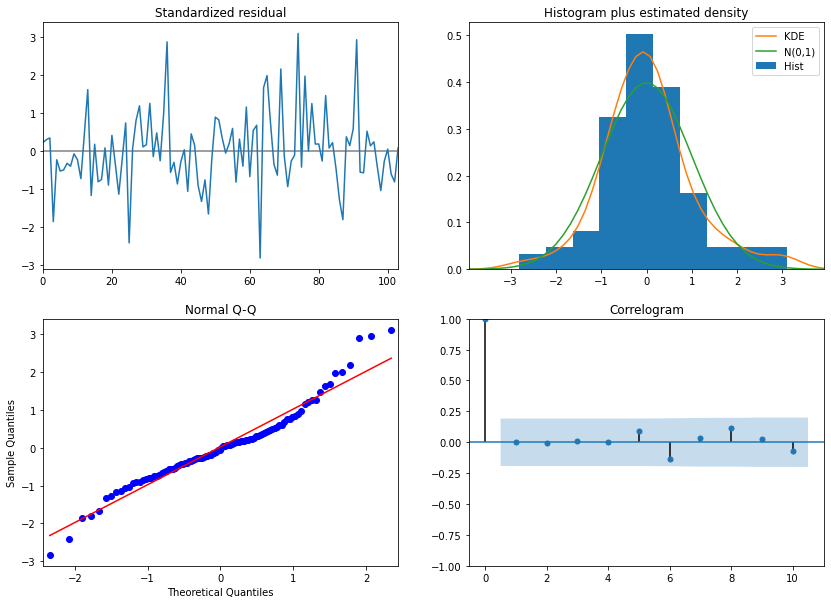

In [152]:
results_manual_SARIMA_12.plot_diagnostics()
plt.show()

In [153]:
predicted_manual_SARIMA_12 = results_manual_SARIMA_12.get_forecast(steps=len(test))

In [154]:
predicted_manual_SARIMA_12.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,2610.617549,328.204770,1967.348020,3253.887078
1,2932.748443,333.668552,2278.770098,3586.726788
2,3395.187948,335.079718,2738.443769,4051.932127
3,3073.991185,339.012434,2409.539024,3738.443347
4,3276.915647,340.524425,2609.500038,3944.331256


In [155]:
rmse = metrics.mean_squared_error(test['SoftDrinkProduction'],predicted_manual_SARIMA_12.predicted_mean,squared=False)
print(rmse)

431.3084741683875


In [156]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['SARIMA(0,1,0)(3,1,1,12)'])


resultsArima = pd.concat([resultsArima,temp_resultsDf])

resultsArima

,RMSE
"ARIMA(1,1,2)",785.379151
"ARIMA_MAN(3,1,2)",784.734536
"SARIMA(0,1,2)(2,0,2,6)",447.945197
"SARIMA(1,1,2)(2,0,2,12)",437.707409
"SARIMA(0,1,0)(3,1,1,12)",431.308474


In [157]:
auto_SARIMA_12_full = sm.tsa.statespace.SARIMAX(df['SoftDrinkProduction'].values,
                                order=(1, 1, 2),
                                seasonal_order=(2, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_12_full = auto_SARIMA_12.fit(maxiter=1000)
print(results_auto_SARIMA_12_full.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(0, 1, 2)x(2, 0, 2, 12)   Log Likelihood                -751.604
Date:                            Mon, 16 Aug 2021   AIC                           1517.208
Time:                                    12:03:10   BIC                           1535.719
Sample:                                         0   HQIC                          1524.707
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9980      0.141     -7.092      0.000      -1.274      -0.722
ma.L2         -0.1064      0.121   

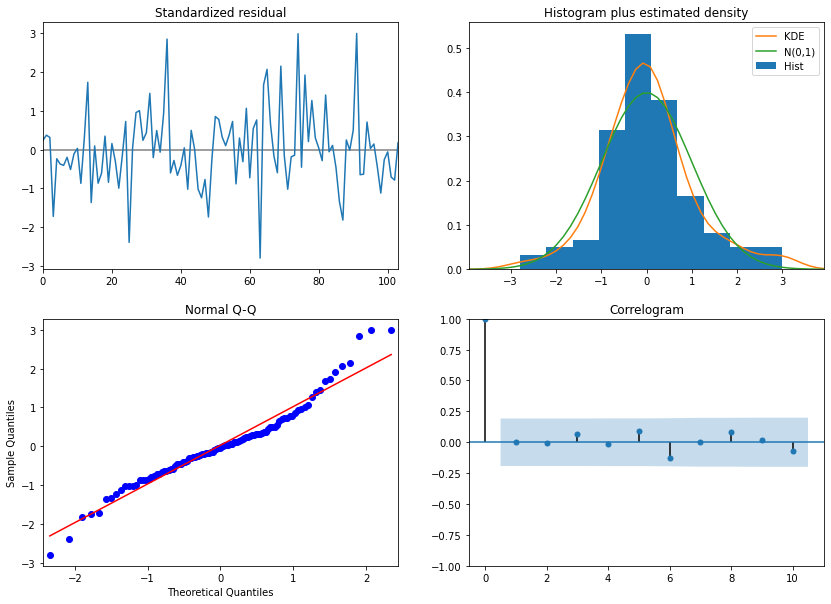

In [158]:
results_auto_SARIMA_12_full.plot_diagnostics()
plt.show()

In [159]:
predicted_manual_SARIMA_12_full_data = results_auto_SARIMA_12_full.get_forecast(steps=12)

In [160]:
predicted_manual_SARIMA_12_full_data.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,2657.038572,328.611986,2012.970915,3301.106229
1,2979.319755,334.135024,2324.427142,3634.212368
2,3404.303347,335.600779,2746.537907,4062.068787
3,3086.472484,337.060814,2425.845428,3747.099539
4,3284.546411,338.514578,2621.070029,3948.022793


In [161]:
rmse = metrics.mean_squared_error(df['SoftDrinkProduction'],results_auto_SARIMA_12_full.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

ValueError: Found input variables with inconsistent numbers of samples: [187, 132]

In [162]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_12_full_data.summary_frame(alpha=0.05).set_index(pd.date_range(start='1995-08-01',end='1996-07-31', freq='M'))

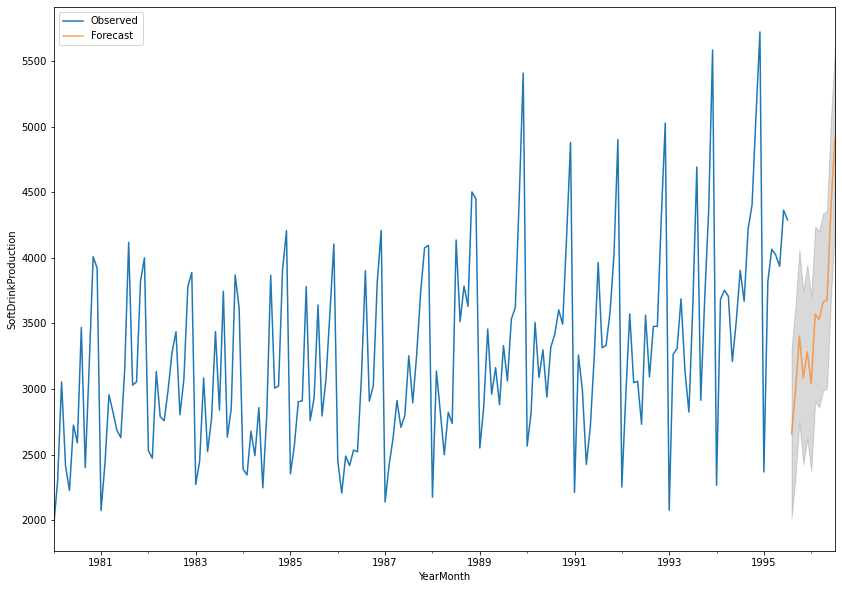

In [163]:
axis = df['SoftDrinkProduction'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='k', alpha=.15)
axis.set_xlabel('YearMonth')
axis.set_ylabel('SoftDrinkProduction')
plt.legend(loc='best')
plt.show()

In [164]:
resultsArima

,RMSE
"ARIMA(1,1,2)",785.379151
"ARIMA_MAN(3,1,2)",784.734536
"SARIMA(0,1,2)(2,0,2,6)",447.945197
"SARIMA(1,1,2)(2,0,2,12)",437.707409
"SARIMA(0,1,0)(3,1,1,12)",431.308474


In [165]:
resultsArima_full = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['SARIMA _Full(1, 1, 2)(2, 0, 2, 12)'])


resultsArima = pd.concat([resultsArima,resultsArima_full])

resultsArima

,RMSE
"ARIMA(1,1,2)",785.379151
"ARIMA_MAN(3,1,2)",784.734536
"SARIMA(0,1,2)(2,0,2,6)",447.945197
"SARIMA(1,1,2)(2,0,2,12)",437.707409
"SARIMA(0,1,0)(3,1,1,12)",431.308474
"SARIMA _Full(1, 1, 2)(2, 0, 2, 12)",431.308474
